In [1]:
from time import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()

In [3]:
dir(iris)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [4]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [5]:
data = pd.DataFrame(iris.data, columns = iris.feature_names)
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
data['catg'] = iris.target

In [7]:
data.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),catg
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [8]:
data.catg.value_counts()

2    50
1    50
0    50
Name: catg, dtype: int64

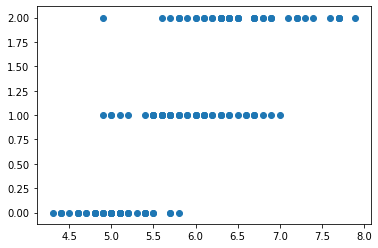

In [9]:
plt.scatter(data['sepal length (cm)'],data.catg)

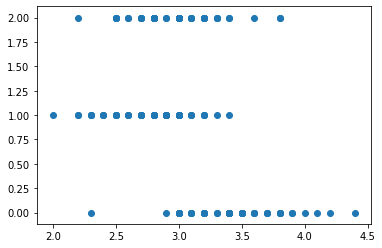

In [10]:
plt.scatter(data['sepal width (cm)'],data.catg)

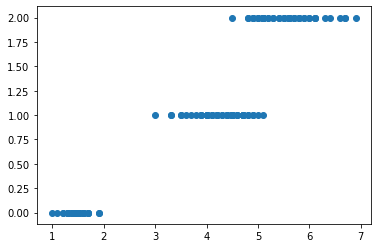

In [11]:
plt.scatter(data['petal length (cm)'],data.catg)

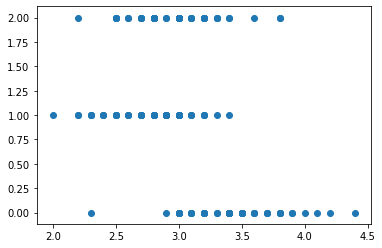

In [12]:
plt.scatter(data['sepal width (cm)'],data.catg)

In [13]:
x = data.drop(['catg'], axis =1 )
x.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [14]:
y = data['catg']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: catg, dtype: int32

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
scaled_x_train = scaler.transform(x_train)

In [17]:
scaler.fit(x_test)
scaled_x_test = scaler.transform(x_test)

In [18]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors = 2)
model.fit(scaled_x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [19]:
y_pred = model.predict(scaled_x_test)
y_pred.shape

(50,)

In [20]:
y_test.shape

(50,)

In [21]:
model.score(scaled_x_test,y_test)

0.94

In [22]:
from sklearn.model_selection import cross_val_score
model_cv = KNeighborsClassifier(n_neighbors=2)
cv_scores = cross_val_score(model_cv, x, y, cv=5)
print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))

[0.96666667 0.93333333 0.93333333 0.9        1.        ]
cv_scores mean:0.9466666666666665


In [23]:
s = []
for i in range(1,20):
    model = KNeighborsClassifier(n_neighbors = i)
    model.fit(scaled_x_train,y_train)
    s.append(model.score(scaled_x_test,y_test))

In [24]:
s

[0.94,
 0.94,
 1.0,
 0.98,
 0.98,
 1.0,
 1.0,
 0.98,
 1.0,
 1.0,
 1.0,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.96]

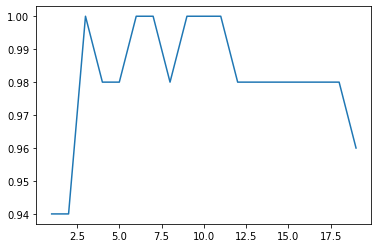

In [25]:
plt.plot(range(1,20),s)

In [26]:
from sklearn.cluster import KMeans
kmeans_model = KMeans(n_clusters=3)
kmeans_model.fit(scaled_x_train,y_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [27]:
kmeans_model.predict(scaled_x_test)

array([1, 2, 0, 1, 1, 2, 1, 0, 1, 1, 0, 2, 2, 2, 2, 0, 0, 1, 1, 0, 2, 1,
       2, 0, 0, 0, 1, 0, 2, 2, 2, 2, 0, 2, 2, 1, 0, 2, 2, 2, 1, 1, 0, 2,
       2, 1, 1, 0, 1, 0])

In [28]:
kmeans_model.score(scaled_x_train)

-93.19379047023521

In [29]:
kmeans_model.inertia_

93.19379047023524

In [30]:
s = []
for i in range(1,20):
    kmeans_model = KMeans(n_clusters=i)
    kmeans_model.fit(scaled_x_train,y_train)
    s.append(kmeans_model.inertia_)

In [31]:
s

[399.99999999999994,
 158.6264290366094,
 93.19379047023524,
 72.23983095752959,
 58.15501519958528,
 51.19357724814501,
 46.040684012054555,
 40.13352421184898,
 36.30562124534889,
 32.43493888589412,
 29.811788247398752,
 25.098542544314473,
 23.717051735765686,
 21.51712674091073,
 20.47405627244805,
 19.486560636161094,
 17.228643220476652,
 16.37246756930719,
 14.77867471716369]

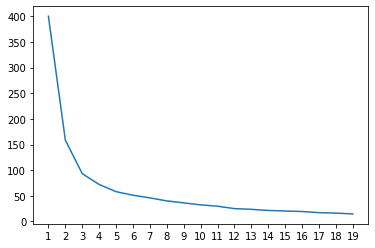

In [32]:
plt.plot(range(1,20,1),s)
plt.xticks(range(1,20))
plt.show()